Justin Guthrie, Julia Luo, Emma Shek, Sabrina Zhou

## Type 2 Diabetes Prediction - Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#load data from a csv file
df_diabetes = pd.read_csv('diabetes.csv')

#inspect the dimensons
print('There are {} rows and {} columns.'.format(df_diabetes.shape[0], df_diabetes.shape[1]))

There are 768 rows and 9 columns.


In [3]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It does not make sens for 0 to be the minimum value for Glucose, BloodPressure,  SkinThickness, Insulin, and BMI. We will tackle this by replacing them with NaN so we can impute them with values.

In [6]:
df_clean = df_diabetes.copy()
df_clean[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_clean[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# showing the count of Nans
print(df_clean.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [7]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now that we have replaced the 0 values with NaN, they are no longer affecting the integrity of the data. We can see that now the mean for Glucose, BloodPressure, SkinThickness, Insulin, and BMI have all increased and is more representative of the data. Previously the null 0 values were affecting the mean by bringing it down.

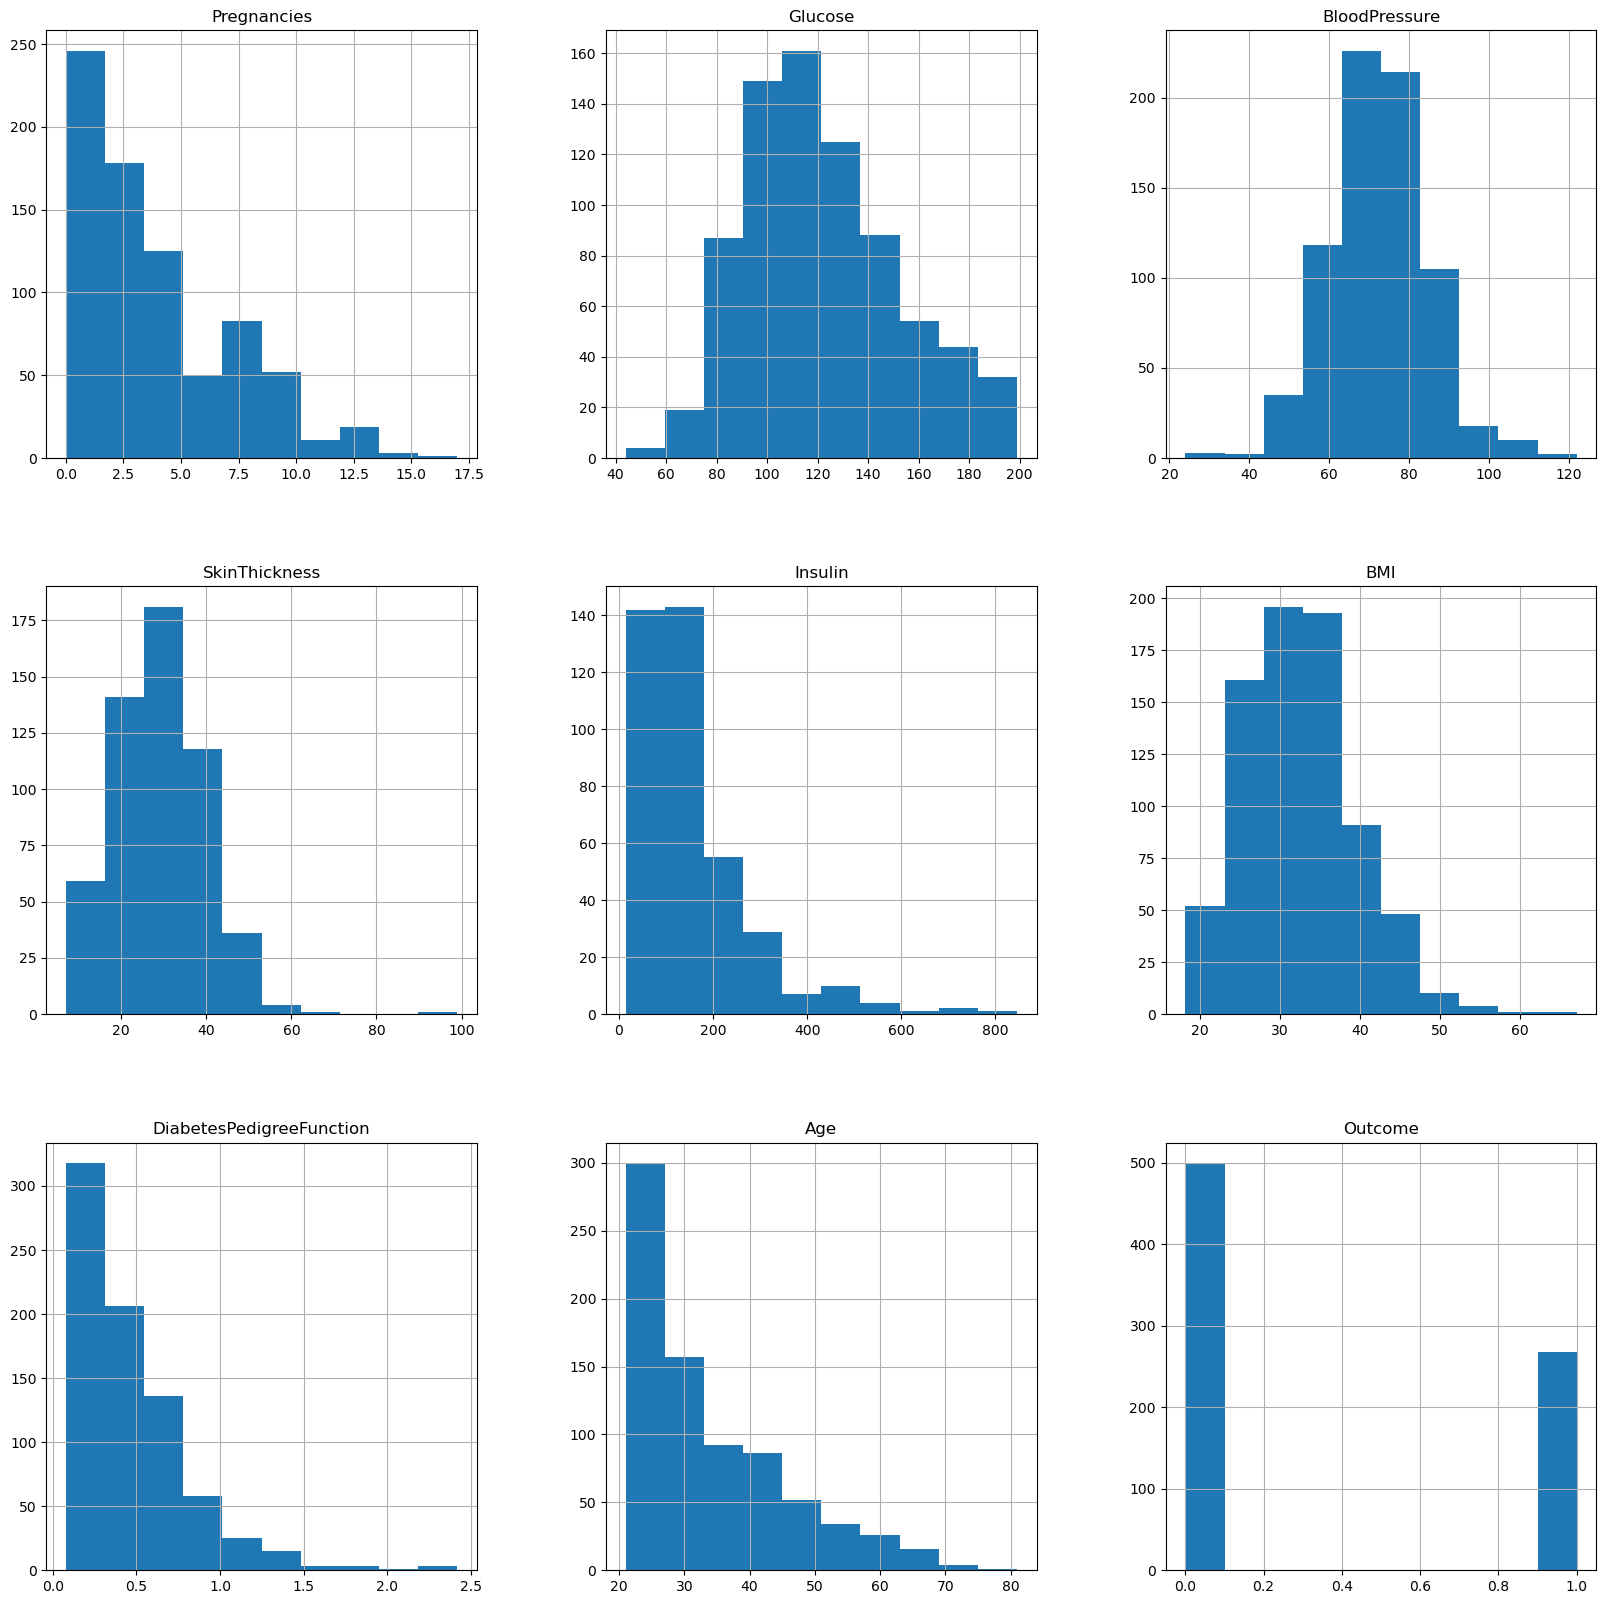

In [8]:
# to see distribution w NaN values
before_impute = df_clean.hist(figsize = (20,20))

Upon visualizing the distributions of each column before imputing the NaN values, we can get a better sense of the distribution of the data in each column. This will allow us to decide what value to use when we impute the NaN values. For Glucose and BloodPressure the distribution appears to be normal, so the NaN values can be imputed by the mean. For SkinThickness, Insulin, and BMI, those NaN values are best to be imputed by the median because those distributions appear to be skewed right and mean is not resistance to outliers.

In [9]:
# impute NaN values with the mean
df_clean['Glucose'].fillna(df_clean['Glucose'].mean(), inplace = True)
df_clean['BloodPressure'].fillna(df_clean['BloodPressure'].mean(), inplace = True)
df_clean['SkinThickness'].fillna(df_clean['SkinThickness'].median(), inplace = True)
df_clean['Insulin'].fillna(df_clean['Insulin'].median(), inplace = True)
df_clean['BMI'].fillna(df_clean['BMI'].median(), inplace = True)

In [10]:
# ensure no more NaN values
print(df_clean.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


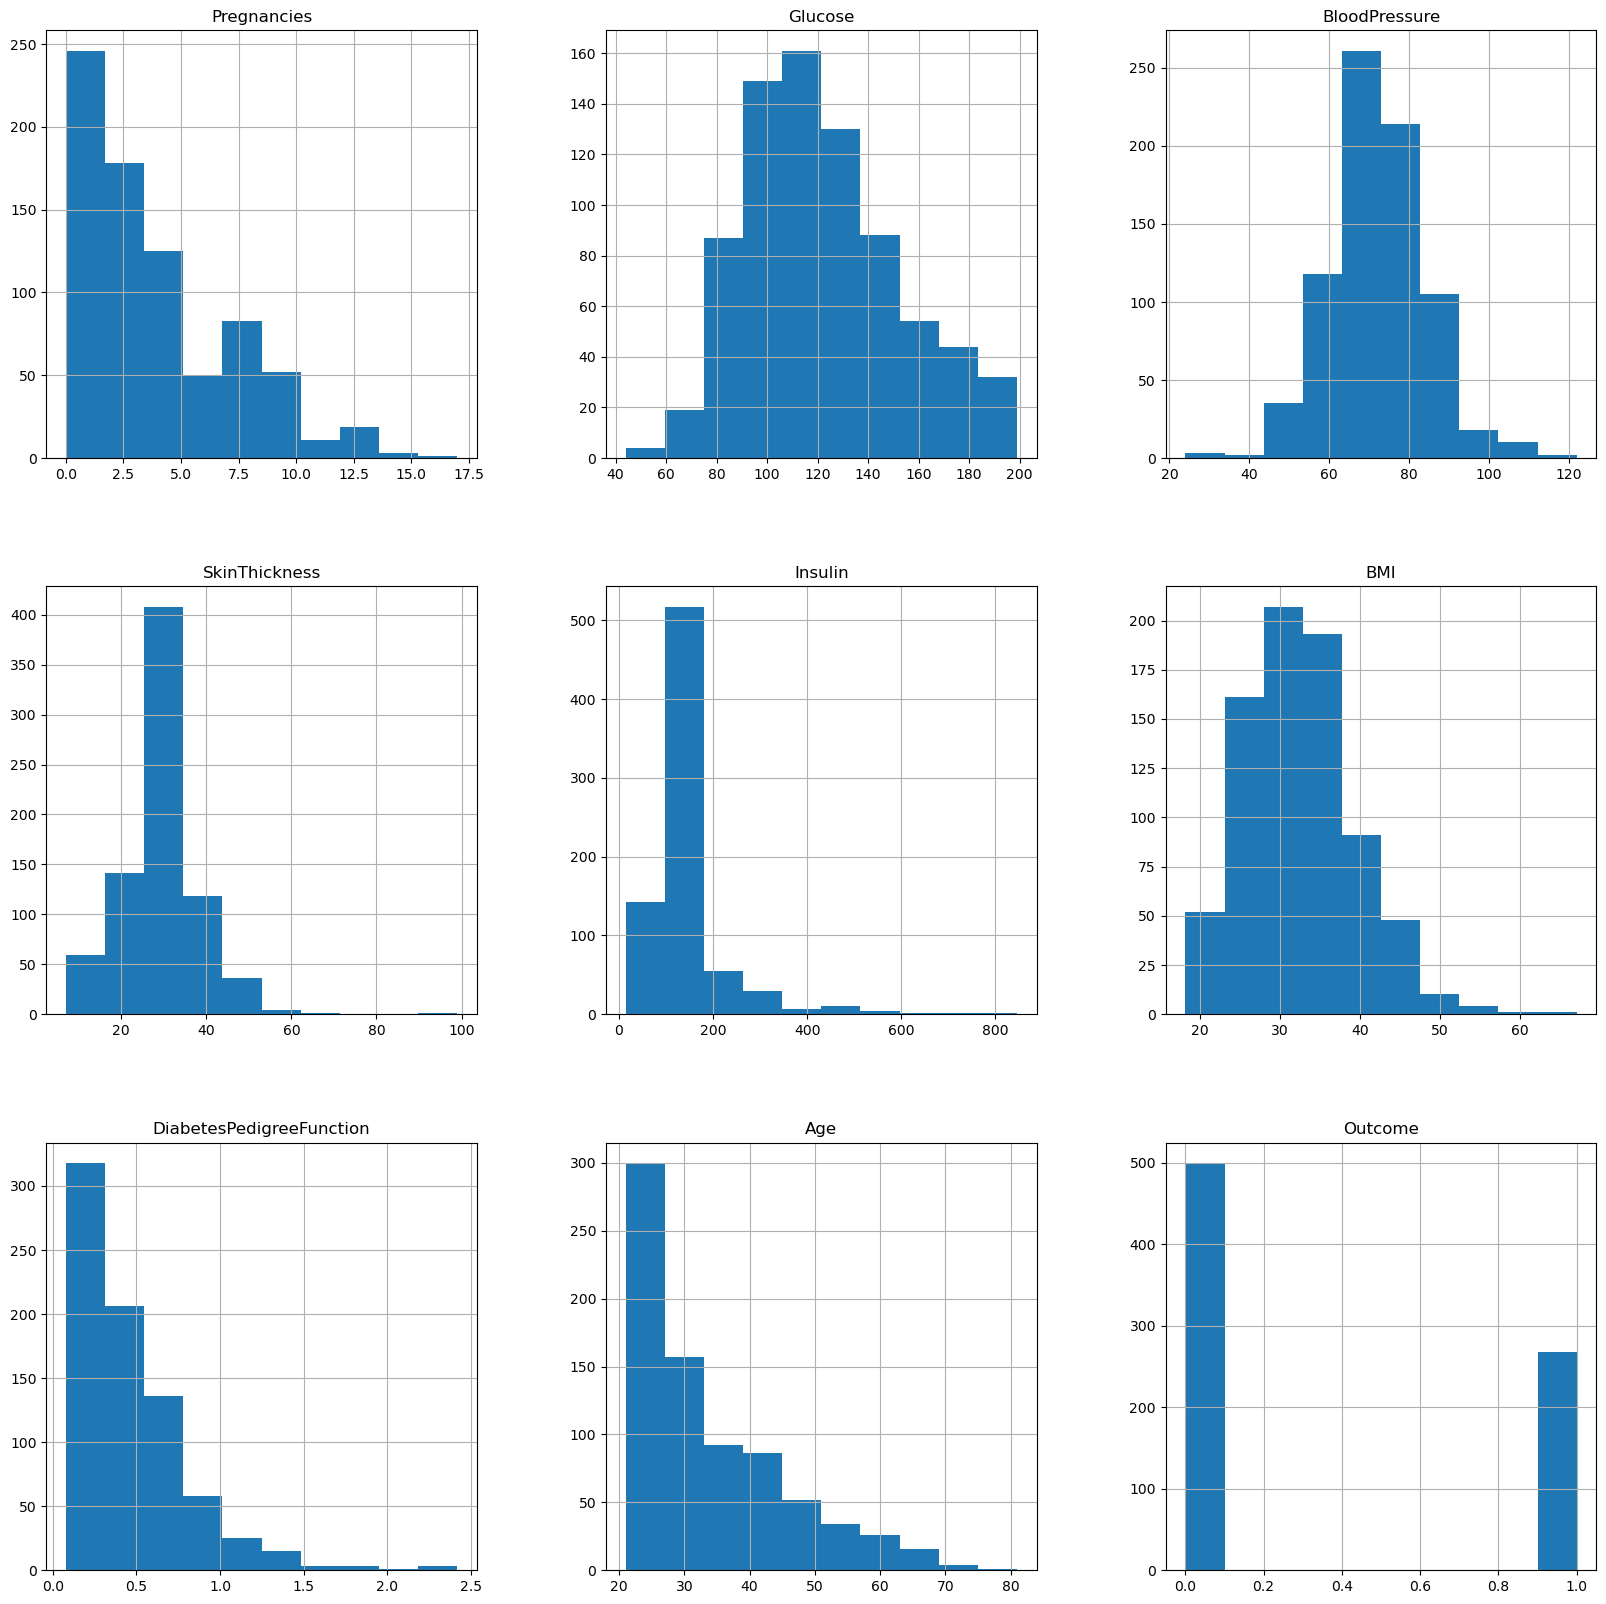

In [12]:
after_impute = df_clean.hist(figsize = (20,20))

In [13]:
# select feature values
glucose = df_clean['Glucose']
bmi = df_clean['BMI']
status = df_clean['Outcome']

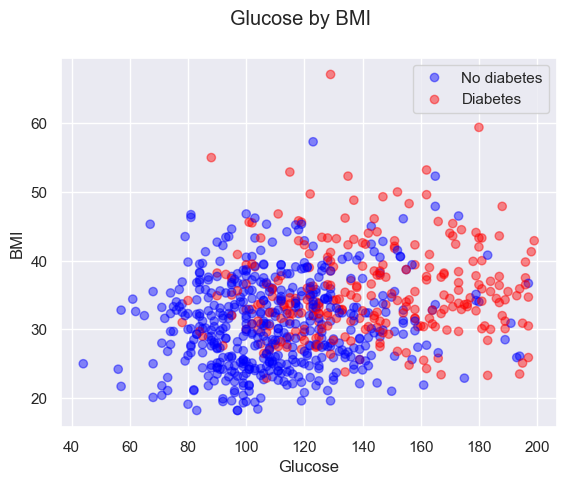

In [43]:
scatter = plt.scatter(glucose, bmi, label='Status', c = status, 
                      cmap = 'bwr', alpha=0.45)

# create color legend
handles, labels = scatter.legend_elements()

# set labels for legend 
labels = ['No diabetes', 'Diabetes']
plt.legend(handles, labels)

# use seaborn to make plot look nicer 
sns.set()
# label x and y axis and title 
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.suptitle('Glucose by BMI')
sns.set()


In this scatter plot, we plotted glucose levels versus BMI percentage, with hues corresponding to either a positive or negative diagnosis of diabetes. As shown, there are two moderately distinct clusters for the positive and negative diagnoses, with a lot of overlap in between the two. Our model hopes to make more sense of this overlap and clearly diagnose diabetes.

In [15]:
skin_thick = df_clean['SkinThickness']
insulin = df_clean['Insulin']
status = df_clean['Outcome']

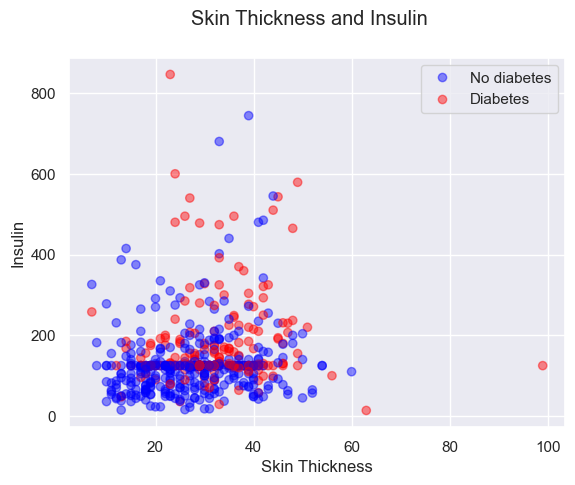

In [44]:
scatter = plt.scatter(skin_thick, insulin, label='Status', c = status, 
                      cmap = 'bwr', alpha=0.45)

# create color legend
handles, labels = scatter.legend_elements()

# set labels for legend 
labels = ['No diabetes', 'Diabetes']
plt.legend(handles, labels)

# label x and y axis and title 
plt.xlabel('Skin Thickness')
plt.ylabel('Insulin')
plt.suptitle('Skin Thickness and Insulin')

sns.set()

The scatterplot above plots skin thickness against insulin, with red indicating positive diagnosis of diabetes and blue indicated negative diagnosis of diabetes. There is a blurred line between negative diagnosis with insulin levels around 140 and a less clear line with skin thickness. Our model hopes to make more sense of this overlap and be able to determine diagnosis based on insulin and skin thickness measurements.

In [17]:
blood_pressure = df_clean['BloodPressure']

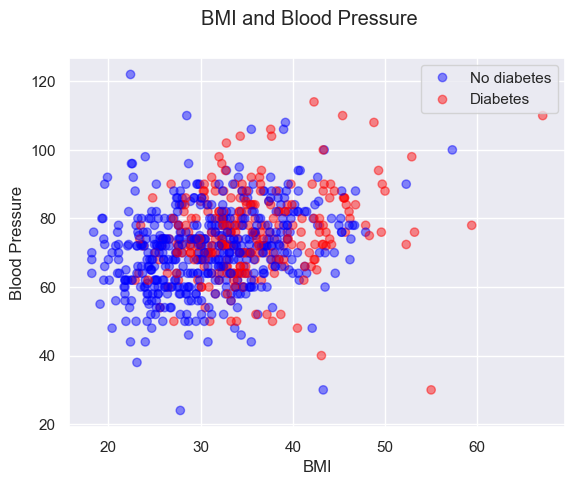

In [45]:
scatter = plt.scatter(bmi, blood_pressure, label='Status', c = status, 
                      cmap = 'bwr', alpha=0.45)

# create color legend
handles, labels = scatter.legend_elements()

# set labels for legend 
labels = ['No diabetes', 'Diabetes']
plt.legend(handles, labels)

# label x and y axis and title 
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.suptitle('BMI and Blood Pressure')

sns.set()

In this scatter plot, we plotted blood pressure levels versus BMI percentage, with hues corresponding to either a positive or negative diagnosis of diabetes. As shown, there are two moderately distinct clusters for the positive and negative diagnoses, with a lot of overlap in between the two. Our model hopes to make more sense of this overlap and clearly diagnose diabetes.

Text(0.5, 0.98, 'Diabetes Status and BMI')

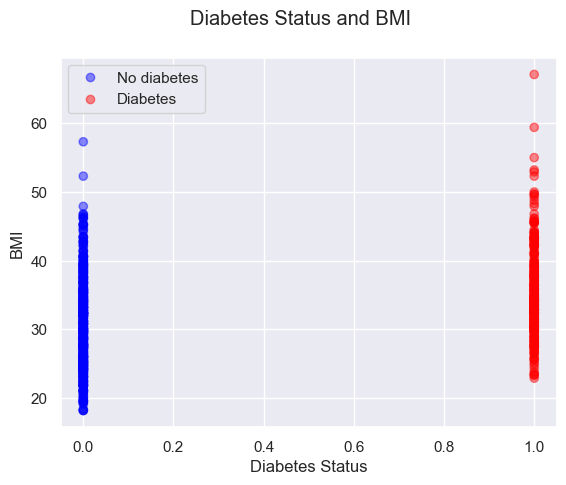

In [46]:
scatter = plt.scatter(status, bmi, label='Status', c = status, 
                      cmap = 'bwr', alpha=0.45)

# create color legend
handles, labels = scatter.legend_elements()

# set labels for legend 
labels = ['No diabetes', 'Diabetes']
plt.legend(handles, labels)

# label x and y axis and title 
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.suptitle('Diabetes Status and BMI')

The BMI of individuals without a type 2 diabetes diagnosis is relatively similar. The BMI range of individuals without diabetes is between 18-60, while the BMI range for individuals with diabetes is higher, ranging from 22-70. This shows a possibility that higher BMI influences diabetes diagnosis.

Text(0.5, 0.98, 'Count of Diabetes Status')

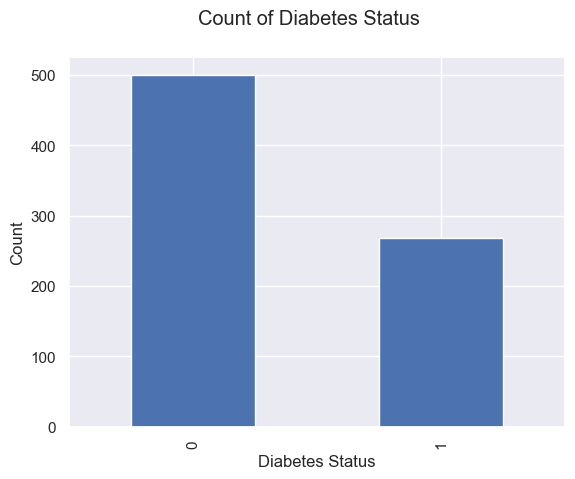

In [20]:
df_clean.groupby(['Outcome'])['BMI'].count().plot(kind = 'bar')

# label x and y axis and title 
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.suptitle('Count of Diabetes Status')

There are about 500 individuals without diabetes and about 260 individuals with diabetes in this data set. This histogram helps visualize the ratio and balance of our data set.

In [21]:
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Random Forest Classifier

In [22]:
# partition the data
X   = df_clean[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                'DiabetesPedigreeFunction', 'Age']] #get the input features
y   = df_clean['Outcome']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    stratify=y      #preserve the distribution of the labels
                                                   )

In [23]:
# build the classifier
rf = RandomForestClassifier(criterion='entropy', n_estimators = 50, random_state = 7)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=7)

In [24]:
# predict the labels for the test set
y_pred   = rf.predict(X_test)

# Prediction accuracy
print('The accuracy of the model is: {}'.format(rf.score(X_test, y_test)))

The accuracy of the model is: 0.7792207792207793


In [25]:
# get the classification report for the decision tree
y_pred = rf.predict(X_test)

target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       150
           1       0.73      0.58      0.65        81

    accuracy                           0.78       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.78      0.77       231



This random forest regressor classification report shows the precision and accuracy of our model. Our model is precise 77% of the time with a negative diagnosis of diabetes, and only 64% precise with positive diagnoses. The recall scores are respectively 84% and 53%, which are moderately low, especially for positive diagnoses. However, the overall accuracy of the model is 73%, which is a positive sign for the development of the model.

# Feature Importance

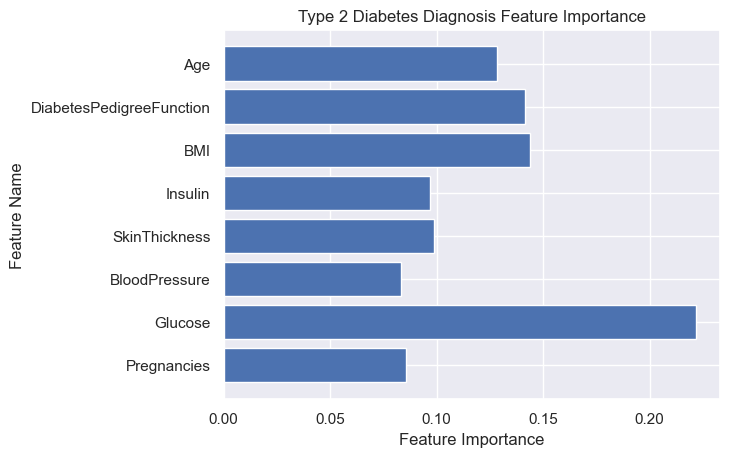

In [26]:
rf.feature_importances_
plt.barh(X_train.columns,rf.feature_importances_)
plt.title("Type 2 Diabetes Diagnosis Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
sns.set()

By implementing feature importance for our random forest classifier, we were able to visualize which factors played the biggest part in predicting diabetes. Glucose levels are by far the most important factor, almost double the score of the next most important feature, while skin thickness is the least.

# Decision Tree Classifier

In [27]:
# partition the data
X   = df_clean[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                'DiabetesPedigreeFunction', 'Age']] #get the input features
y   = df_clean['Outcome']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    stratify=y      #preserve the distribution of the labels
                                                   )

In [28]:
# build the classifier 
dt = DecisionTreeClassifier(criterion='entropy', random_state=7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=7)

In [29]:
#predict the labels for the test set
y_pred   = dt.predict(X_test)

print('The predicted diabetes status is: {}'.format(y_pred))

The predicted diabetes status is: [0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1
 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]


In [30]:
# Prediction accuracy
print('The accuracy of the model is: {}'.format(dt.score(X_test, y_test)))

The accuracy of the model is: 0.7012987012987013


In [31]:
#get the classification report for the decision tree
y_pred = dt.predict(X_test)

target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       150
           1       0.59      0.49      0.54        81

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.69      0.70      0.69       231



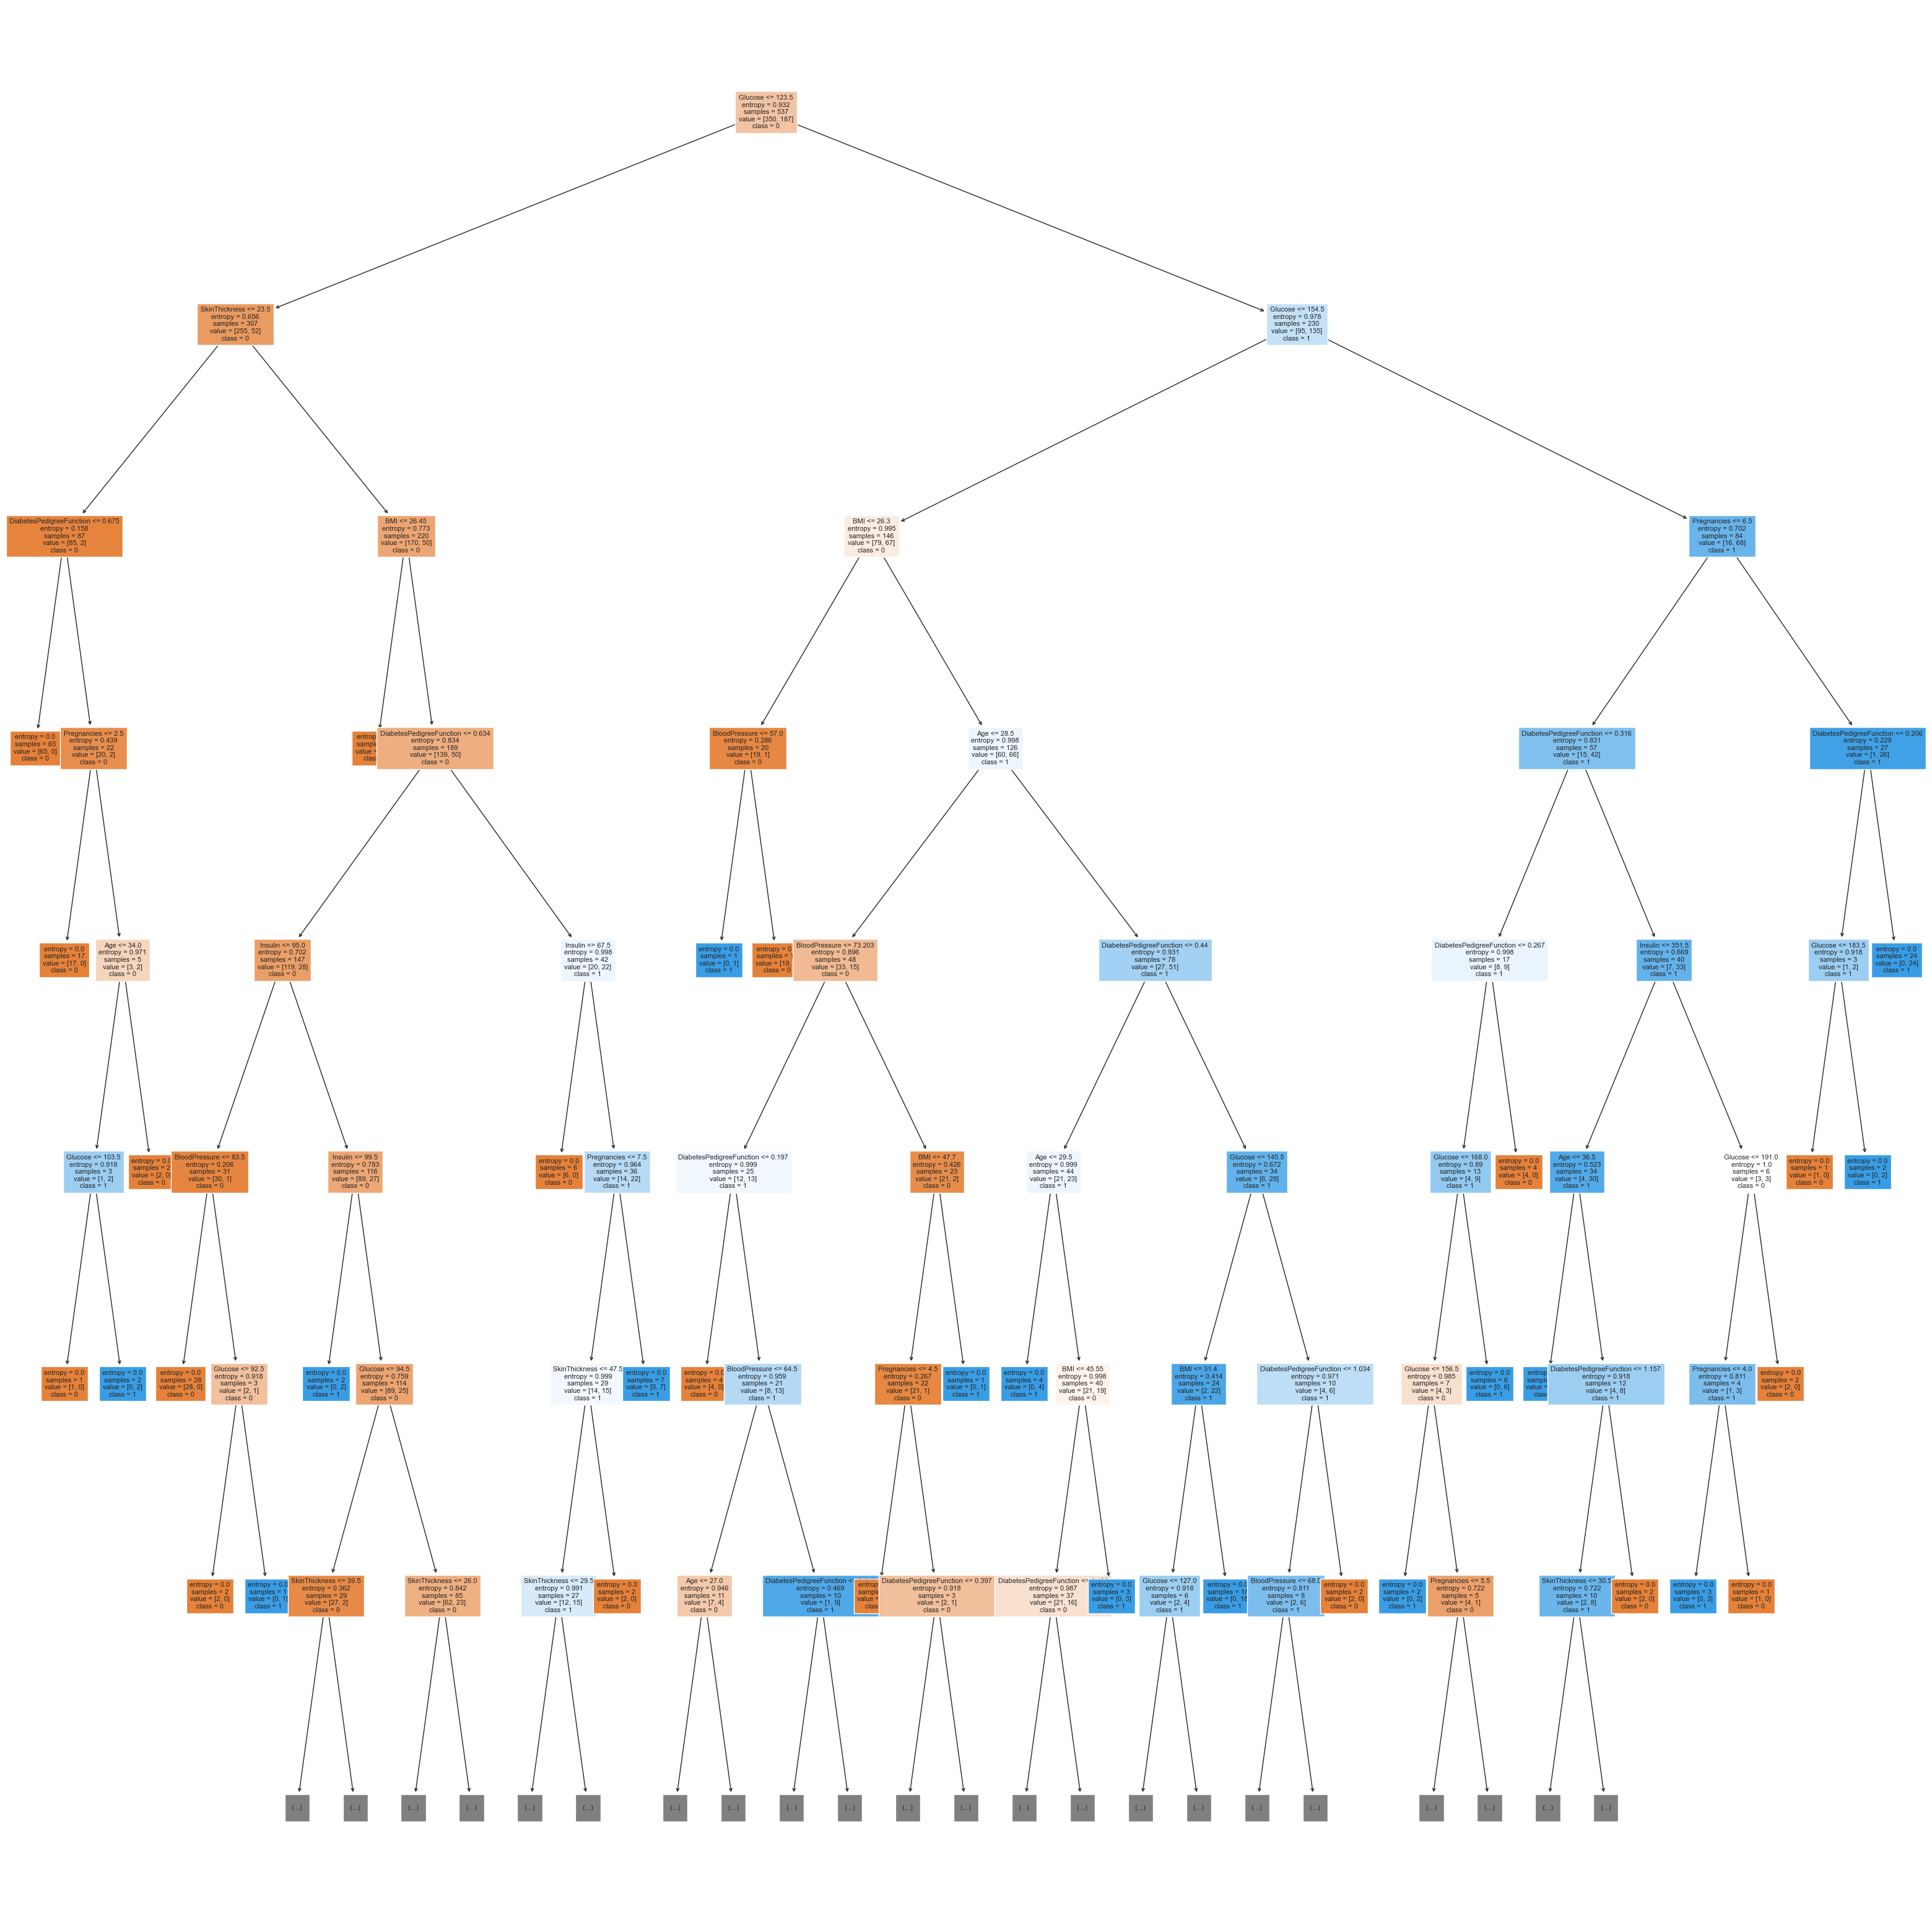

In [32]:
from sklearn import tree

target_names = ['0', '1']

fig = plt.figure(figsize=(40,40))
tree.plot_tree(dt, 
                   feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                'DiabetesPedigreeFunction', 'Age'],  
                   class_names=target_names,
                   filled=True, fontsize=8, max_depth = 7)

plt.show()


This decision tree is a good, albeit verbose, model to show the process the ML model goes into diagnosing diabetes from this dataset. Age, BMI, and glucose are popular classification columns for this dataset, as these columns are most telling in predicting diabetes. As we get further down the decision tree, other factors like pedigree and pregnancies are also considered, which makes for a well-rounded analysis, searching for multiple factors to take into account the prediction of diabetes.

# K Nearest Neighbor Classifier

In [33]:
# partition the data
X   = df_clean[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] #get the input features
y   = df_clean['Outcome']

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    stratify=y      #preserve the distribution of the labels
                                                   )
#build the k-nn model, experiment with different values of k and plot the results

# initialize a knn_classifier
knn = KNeighborsClassifier(n_neighbors = 5) #initialize the classifier and set the number of neighbors

knn.fit(X_train, y_train)

#predict the labels for the test set
y_pred   = knn.predict(X_test)

print('The predicted diabetes outcome: {}'.format(y_pred))

The predicted diabetes outcome: [0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 1 0 0 1 0]


In [34]:
print('The accuracy of the model is: {}'.format(knn.score(X_test, y_test)))

The accuracy of the model is: 0.7316017316017316


In [35]:
#identify a suitable value of k
predictions = {}

for k in range(3, 50, 2): #increment k by 2
    knn = KNeighborsClassifier(n_neighbors = k) #initialize the classifier and set the number of neighbors
    knn.fit(X_train, y_train)
    predictions[k] = knn.score(X_test, y_test)

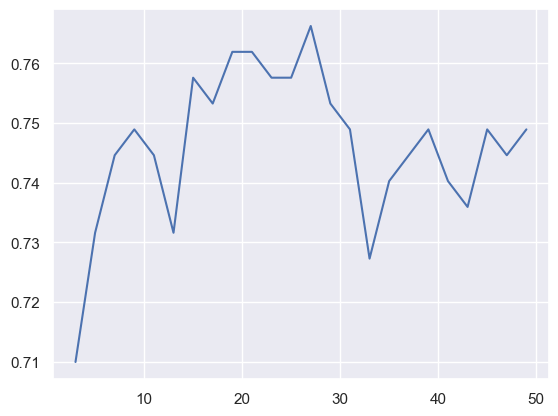

In [36]:
# plot the k values
sns.lineplot(x=predictions.keys(), y=predictions.values())
plt.show()

In [37]:
#get the classification report for the best value of k
knn_3 = KNeighborsClassifier(n_neighbors = 25) #initialize the classifier and set the number of neighbors
knn_3.fit(X_train, y_train)
y_pred = knn_3.predict(X_test)

target_names = ['no diabetes', 'diabetes']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

 no diabetes       0.78      0.87      0.82       150
    diabetes       0.70      0.54      0.61        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



In [47]:
print('The accuracy of the model is: {}'.format(knn_3.score(X_test, y_test)))

The accuracy of the model is: 0.7575757575757576


Using the K nearest neighbor model, the accuracy of the diabetes diagnosis prediction was 0.73. We improved the accuracy of the model by identifying more suitable K-values and chose to use 25 instead of 5. This raised. theaccuarcy of the model to .76. This is a relatively high accuracy score especially when predicting something as complex as human disease. This model should not be used to make strong predictions but can guide recommendations and provide insight into what may influence diagnosis.

# Stratified K-fold

In [38]:
from sklearn.model_selection import StratifiedKFold

from copy import copy
from collections import Counter

k = 1
x_feat_list =['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'] #get the input features
y_feat = 'Outcome'

x = df_clean.loc[:, x_feat_list].values
y_true = df_clean.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# construction of kfold object
kfold = StratifiedKFold(n_splits=3)

# allocate an empty array to store predictions in
y_pred = copy(y_true)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]
    
    print(Counter(y_true_train))
    
    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    knn_classifier.fit(x_train, y_true_train)

    # estimate diabetes diagnosis
    y_pred[test_idx] = knn_classifier.predict(x_test)

Counter({0: 334, 1: 178})
Counter({0: 333, 1: 179})
Counter({0: 333, 1: 179})


In [39]:
accuracy_score(y_true, y_pred)

0.6875

The accuracy of the stratified k-fold KNN model is .69 while the accuracy of the standard KNN model was .73. The stratified K-fold model did not return a higher accuracy score than our original KNN model.

# Cross Validated KNN

In [40]:
def get_cv_acc_knn(x, y_true, k, n_splits=10):
    """ computes cross validated accuracy of a KNN classifier
    
    Args:
        x (np.array): (n_sample, n_feat) features
        y (np.array): (n_sample) target variable
        k 
        
    """
    
    # initialize a knn_classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # construction of kfold object
    kfold = StratifiedKFold(n_splits=n_splits)

    # allocate an empty array to store predictions in
    y_pred = np.empty_like(y_true)

    for train_idx, test_idx in kfold.split(x, y_true):
        # build arrays which correspond to x, y train /test
        x_test = x[test_idx, :]
        x_train = x[train_idx, :]
        y_true_train = y_true[train_idx]


        # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
        knn_classifier.fit(x_train, y_true_train)

        # estimate diabetes diagnosis
        y_pred[test_idx] = knn_classifier.predict(x_test)

    return accuracy_score(y_true, y_pred)


In [41]:
#compute cross validated accuracy of each k
k_all = np.array(range(1,50))
acc = np.empty(k_all.shape, dtype=float)
for idx, k in enumerate(k_all):
    acc[idx] = get_cv_acc_knn(x, y_true, k)

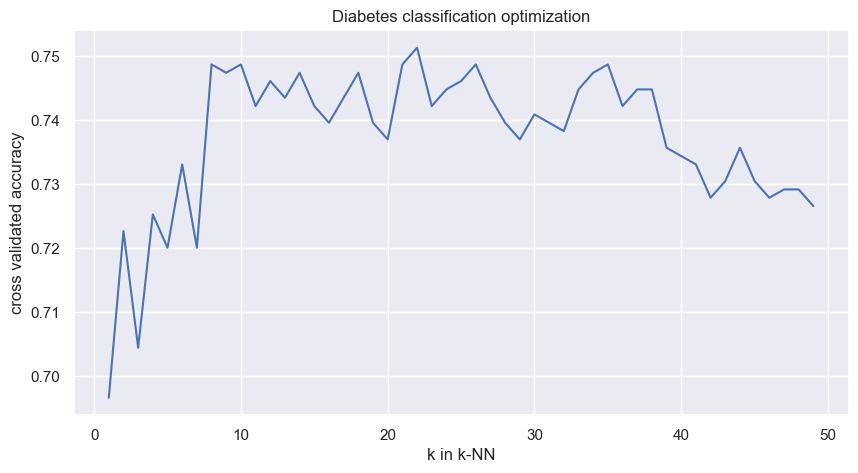

In [42]:
plt.plot(k_all, acc)
plt.xlabel('k in k-NN')
plt.ylabel('cross validated accuracy')
plt.title('Diabetes classification optimization')
plt.gcf().set_size_inches(10,5)

We wanted to try and improve the accuracy score for our k-nn model by implementing a cross validated KNN. However, by looking at our graph comparing the k value and accuracy score, the max new score is around 0.76, which isn’t a big improvement from the accuracy without cross validation (0.73). 